## Import Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib
import plotly.figure_factory as ff
from IPython.core.display import display

# pd.set_option('display.max_columns', None)
# pd.reset_optio('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

In [6]:
def get_df_with_geofips(df, state_code, county_code):
    ''' Returns dataframe with geofips column '''
    state_code = df[state_code].astype(str).values
    county_code = df[county_code].astype(str).values

    geofips = []
    for stateID, countyID in zip(state_code, county_code):
        id = ''
        stateLen = len(stateID)
        countyLen = len(countyID)
        if(stateLen < 2):
            id += '0' + stateID
        else:
            id += stateID
        if(countyLen == 1):
            id += '00' + countyID
        elif(countyLen == 2):
            id += '0' + countyID
        else:
            id += countyID
        geofips.append(id)

    df.insert(loc=0, column='GeoFIPS', value=geofips)
    return df

In [3]:
daily_aqi_by_county_2017 = pd.read_csv('../../data/raw/daily_aqi_by_county_2017.csv', encoding='latin-1')
daily_aqi_by_county_2018 = pd.read_csv('../../data/raw/daily_aqi_by_county_2018.csv')
daily_aqi_by_county_2019 = pd.read_csv('../../data/raw/daily_aqi_by_county_2019.csv')

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,21,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,22,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,19,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,30,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,16,Good,PM2.5,01-003-0010,1


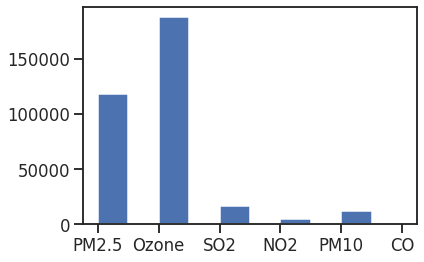

In [5]:
display(daily_aqi_by_county_2017.head())
plt.hist(daily_aqi_by_county_2017['Defining Parameter'])
plt.show()

In [7]:
daily_aqi_by_county_2017 = get_df_with_geofips(daily_aqi_by_county_2017, 'State Code', 'County Code')
daily_aqi_by_county_2018 = get_df_with_geofips(daily_aqi_by_county_2018, 'State Code', 'County Code')
daily_aqi_by_county_2019 = get_df_with_geofips(daily_aqi_by_county_2019, 'State Code', 'County Code')


In [9]:
# fips = daily_aqi_by_county_2017['GeoFIPS'].tolist()
# values = daily_aqi_by_county_2017['Defining Parameter'].tolist()
#
# fig = ff.create_choropleth(fips=fips, values=values, county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
#     legend_title='AQI per county')
#
# fig.layout.template = None
# fig.show()
#
#

In [ ]:

# fips = daily_aqi_by_county_2017['GeoFIPS'].tolist()
# values = daily_aqi_by_county_2017['AQI_2017'].tolist()
#
# fig = ff.create_choropleth(fips=fips, values=values, county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
#     legend_title='AQI per county')
#
# fig.layout.template = None
# fig.show()